In [264]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [265]:
train=pd.read_csv('./data/train.csv')
test=pd.read_csv('./data/test.csv')

In [266]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [267]:
train.shape

(7613, 5)

In [268]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [269]:
train.isnull().mean().sort_values(ascending=True)

id          0.000000
text        0.000000
target      0.000000
keyword     0.008013
location    0.332720
dtype: float64

Here we can see we have very less nan values in keyword column so we can use the most occured keyword by frequency here

In [270]:
train.groupby(['keyword'])['keyword'].count()

keyword
ablaze                 36
accident               35
aftershock             34
airplane%20accident    35
ambulance              38
                       ..
wounded                37
wounds                 33
wreck                  37
wreckage               39
wrecked                39
Name: keyword, Length: 221, dtype: int64

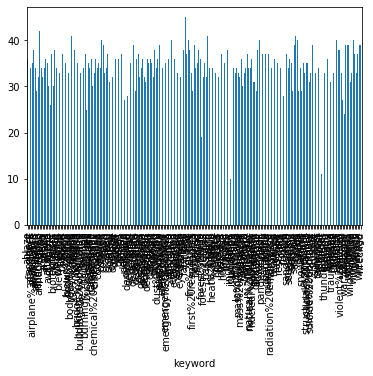

In [271]:
train.groupby(['keyword'])['keyword'].count().plot.bar()

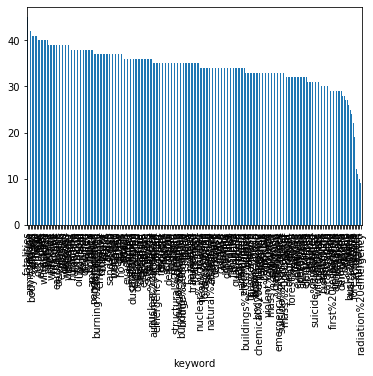

In [272]:
train.groupby(['keyword'])['keyword'].count().sort_values(ascending=False).plot.bar()

In [273]:
train['keyword'].value_counts().index[0]

'fatalities'

In [274]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [275]:
impute_nan(train,'keyword')

In [276]:
train.isnull().sum()

id             0
keyword        0
location    2533
text           0
target         0
dtype: int64

Now let us deal with the location column as it is having much large amount of nan value we cannot use simply frequent values directly

In [277]:
import numpy as np
# here i am capturing the importance of the nan values
train['location_Var']=np.where(train['location'].isnull(),1,0)

In [278]:
train.head()

,id,keyword,location,text,target,location_Var
0,1,fatalities,NaN,Our Deeds are the Reason of this #earthquake M...,1,1
1,4,fatalities,NaN,Forest fire near La Ronge Sask. Canada,1,1
2,5,fatalities,NaN,All residents asked to 'shelter in place' are ...,1,1
3,6,fatalities,NaN,"13,000 people receive #wildfires evacuation or...",1,1
4,7,fatalities,NaN,Just got sent this photo from Ruby #Alaska as ...,1,1


In [279]:
# after finding the importance of nan values replace it with the most frequent ones
frequent=train['location'].mode()[0]
train['location'].fillna(frequent,inplace=True)

In [280]:
train.head()

,id,keyword,location,text,target,location_Var
0,1,fatalities,USA,Our Deeds are the Reason of this #earthquake M...,1,1
1,4,fatalities,USA,Forest fire near La Ronge Sask. Canada,1,1
2,5,fatalities,USA,All residents asked to 'shelter in place' are ...,1,1
3,6,fatalities,USA,"13,000 people receive #wildfires evacuation or...",1,1
4,7,fatalities,USA,Just got sent this photo from Ruby #Alaska as ...,1,1


Let us do the same with the test set also since it is also having some nan values

In [281]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

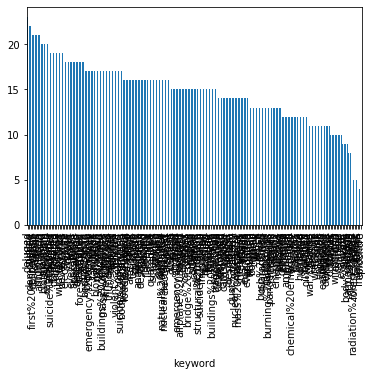

In [282]:
test.groupby(['keyword'])['keyword'].count().sort_values(ascending=False).plot.bar()

In [283]:
test['keyword'].value_counts().index[0]

'deluged'

In [284]:
impute_nan(test,'keyword')

In [285]:
test['location_Var']=np.where(test['location'].isnull(),1,0)
frequent=test['location'].mode()[0]
test['location'].fillna(frequent,inplace=True)

In [286]:
test.head()

,id,keyword,location,text,location_Var
0,0,deluged,New York,Just happened a terrible car crash,1
1,2,deluged,New York,"Heard about #earthquake is different cities, s...",1
2,3,deluged,New York,"there is a forest fire at spot pond, geese are...",1
3,9,deluged,New York,Apocalypse lighting. #Spokane #wildfires,1
4,11,deluged,New York,Typhoon Soudelor kills 28 in China and Taiwan,1


Now since we have dealt with all of the nan value lets do some data preprocessing

In [287]:
X_train=train.drop('target',axis=1)
X_train.head()

,id,keyword,location,text,location_Var
0,1,fatalities,USA,Our Deeds are the Reason of this #earthquake M...,1
1,4,fatalities,USA,Forest fire near La Ronge Sask. Canada,1
2,5,fatalities,USA,All residents asked to 'shelter in place' are ...,1
3,6,fatalities,USA,"13,000 people receive #wildfires evacuation or...",1
4,7,fatalities,USA,Just got sent this photo from Ruby #Alaska as ...,1


In [288]:
y_train=train['target']
y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [238]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [239]:
tweets=train.copy()

In [240]:
test_tweets=test.copy()

In [241]:
tweets['text'][0:10]

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
5    #RockyFire Update => California Hwy. 20 closed...
6    #flood #disaster Heavy rain causes flash flood...
7    I'm on top of the hill and I can see a fire in...
8    There's an emergency evacuation happening now ...
9    I'm afraid that the tornado is coming to our a...
Name: text, dtype: object

In [242]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [243]:
# Lowering the text
# Removing all the special characters and stop words
ps = PorterStemmer()
corpus = []
for i in range(0, len(tweets)):
    review = re.sub('[^a-zA-Z]', ' ', tweets['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [244]:
ps = PorterStemmer()
corpus1 = []
for i in range(0, len(test_tweets)):
    review = re.sub('[^a-zA-Z]', ' ', test_tweets['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus1.append(review)

In [245]:
# have a look how our corpus looks like after cleaning our data
corpus[0:10]

['deed reason earthquak may allah forgiv us',
 'forest fire near la rong sask canada',
 'resid ask shelter place notifi offic evacu shelter place order expect',
 'peopl receiv wildfir evacu order california',
 'got sent photo rubi alaska smoke wildfir pour school',
 'rockyfir updat california hwi close direct due lake counti fire cafir wildfir',
 'flood disast heavi rain caus flash flood street manit colorado spring area',
 'top hill see fire wood',
 'emerg evacu happen build across street',
 'afraid tornado come area']

In [246]:
# Applying Countvectorizer & Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=4500,ngram_range=(1,3))
X_train = cv.fit_transform(corpus).toarray()

In [297]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=4500,ngram_range=(1,3))
test = cv.fit_transform(corpus1).toarray()

In [248]:
# # Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [249]:
X_train.shape

(6090, 4500)

In [250]:
cv.get_feature_names()[:20]

['aa',
 'aba',
 'aba woman',
 'aba woman deliv',
 'abandon',
 'abandon lrt',
 'abandon lrt station',
 'abbswinston',
 'abbswinston zionist',
 'abbswinston zionist terrorist',
 'abc',
 'abc news',
 'abc news http',
 'ablaz',
 'ablaz http',
 'ablaz http co',
 'absolut',
 'absolut flatten',
 'abstorm',
 'abus']

In [251]:
countvec_df = pd.DataFrame(X_train, columns=cv.get_feature_names())
countvec_df.head()

,aa,aba,aba woman,aba woman deliv,abandon,abandon lrt,abandon lrt station,abbswinston,abbswinston zionist,abbswinston zionist terrorist,...,yr old pkk,yyc,yycstorm,zero,zionist,zionist terrorist,zombi,zombi apocalyps,zone,zouma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now Building the model

In [252]:
from sklearn import metrics
import numpy as np
# MultinomialNB Algorithm¶
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [253]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
cm

accuracy:   0.799


array([[782,  92],
       [214, 435]])

In [254]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.799080761654629

In [256]:
classifier=MultinomialNB(alpha=0.1)

In [257]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.7944845699277742
Alpha: 0.1, Score : 0.8030203545633617
Alpha: 0.2, Score : 0.8036769533814839
Alpha: 0.30000000000000004, Score : 0.8017071569271176
Alpha: 0.4, Score : 0.8017071569271176
Alpha: 0.5, Score : 0.8017071569271176
Alpha: 0.6000000000000001, Score : 0.8010505581089954
Alpha: 0.7000000000000001, Score : 0.8010505581089954
Alpha: 0.8, Score : 0.7997373604727511
Alpha: 0.9, Score : 0.8003939592908733


In [262]:

#Applying Tf-Idf
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=4500,ngram_range=(1,3))
X = tf.fit_transform(corpus).toarray()

In [289]:
# # Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size=0.2, random_state=42)

In [290]:
tf.get_feature_names()[:20]

['aa',
 'ab',
 'aba',
 'aba woman',
 'aba woman deliv',
 'abandon',
 'abandon aircraft',
 'abandon aircraft mma',
 'abc',
 'abc news',
 'abc news http',
 'abcnew',
 'abl',
 'ablaz',
 'ablaz http',
 'ablaz http co',
 'absolut',
 'abstorm',
 'abus',
 'access']

In [291]:
tfidf_df = pd.DataFrame(X_train, columns=cv.get_feature_names())
tfidf_df.head()

,aa,aba,aba woman,aba woman deliv,abandon,abandon lrt,abandon lrt station,abbswinston,abbswinston zionist,abbswinston zionist terrorist,...,yr old pkk,yyc,yycstorm,zero,zionist,zionist terrorist,zombi,zombi apocalyps,zone,zouma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [292]:
from sklearn import metrics
import numpy as np
# MultinomialNB Algorithm¶
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [293]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
cm

accuracy:   0.802


array([[799,  75],
       [226, 423]])

In [294]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8023637557452397

In [295]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.7918581746552856
Alpha: 0.1, Score : 0.8003939592908733
Alpha: 0.2, Score : 0.8017071569271176
Alpha: 0.30000000000000004, Score : 0.8023637557452397
Alpha: 0.4, Score : 0.804333552199606
Alpha: 0.5, Score : 0.8030203545633617
Alpha: 0.6000000000000001, Score : 0.804333552199606
Alpha: 0.7000000000000001, Score : 0.8056467498358503
Alpha: 0.8, Score : 0.804333552199606
Alpha: 0.9, Score : 0.8036769533814839


In [298]:
test_pred=classifier.predict(test)

In [299]:
test_pred

array([1, 0, 1, ..., 1, 1, 0])